In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

In [2]:
ETH= yf.download('ETH-USD', start="2021-03-01", end="2022-03-01") 

[*********************100%***********************]  1 of 1 completed


In [3]:
ETH.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,1417.151123,1567.694580,1416.416138,1564.707642,1564.707642,24032838645
2021-03-02,1564.063477,1597.610107,1461.325439,1492.608765,1492.608765,22523669722
2021-03-03,1491.451172,1650.360596,1481.905762,1575.853149,1575.853149,22674780680
2021-03-04,1574.623779,1622.953857,1511.103394,1541.914307,1541.914307,22906118718
2021-03-05,1541.541748,1547.878174,1450.891357,1533.275024,1533.275024,21067146937


In [4]:
ETH.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-25,2598.436279,2821.972412,2579.208008,2764.535645,2764.535645,17208902048
2022-02-26,2764.989502,2849.424072,2745.009033,2781.111816,2781.111816,11724648351
2022-02-27,2780.504395,2831.125488,2581.615723,2621.801758,2621.801758,16150857254
2022-02-28,2621.172119,2929.180420,2586.388184,2919.201172,2919.201172,19266124733
2022-03-01,2919.775879,3029.651611,2868.938965,2972.485107,2972.485107,18757425786


In [7]:
ETH['Adj Close'].tail(130) # ETH_6M 

Date
2021-10-23    4171.663574
2021-10-24    4087.903076
2021-10-25    4217.876953
2021-10-26    4131.102051
2021-10-27    3930.257324
                 ...     
2022-02-25    2764.535645
2022-02-26    2781.111816
2022-02-27    2621.801758
2022-02-28    2919.201172
2022-03-01    2972.485107
Name: Adj Close, Length: 130, dtype: float64

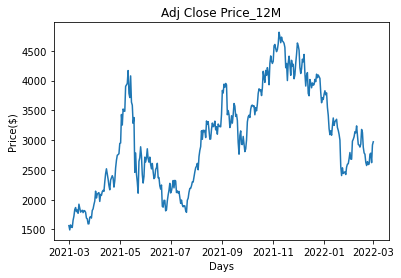

In [8]:
import matplotlib.pyplot as plt # Movement of the stock Adj Close price (12M)
fig = plt.figure()
plt.plot(ETH['Adj Close'])
plt.xlabel('Days')
plt.ylabel('Price($)')
plt.title('Adj Close Price_12M');

In [9]:
log_return_12M = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
log_return_12M[:5]

Date
2021-03-01         NaN
2021-03-02   -0.047174
2021-03-03    0.054271
2021-03-04   -0.021772
2021-03-05   -0.005619
Name: Adj Close, dtype: float64

In [11]:
ETHvol = log_return_12M.std() * np.sqrt(365)
print('The annualised volatility over 12 months is', round(ETHvol * 100,2), '%')

The annualised volatility over 12 months is 99.1 %


In [12]:
# Cash-or-Nothing Binary put option (ETSY)
# Pricing methods

# 1 Binomial Tree Method

S0 =3459 # dated 01-04-2022
K = 3000
T = 2/12
r = 0.0225 # dated 21-03-2021
sigma = 0.991 # from calculated volatility (prior 12M period)
N = 10
payoff = "put"

In [13]:
dT = float(T) / N
u = np.exp(sigma * np.sqrt(dT))
d = 1 / u

In [14]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1
S

array([[ 3459.        ,  3931.0913315 ,  4467.61464486,  5077.36374758,
         5770.33264382,  6557.87933969,  7452.91200499,  8470.10054271,
         9626.11703393, 10939.90899915, 12433.00995488],
       [    0.        ,  3043.60290592,  3459.        ,  3931.0913315 ,
         4467.61464486,  5077.36374758,  5770.33264382,  6557.87933969,
         7452.91200499,  8470.10054271,  9626.11703393],
       [    0.        ,     0.        ,  2678.0915435 ,  3043.60290592,
         3459.        ,  3931.0913315 ,  4467.61464486,  5077.36374758,
         5770.33264382,  6557.87933969,  7452.91200499],
       [    0.        ,     0.        ,     0.        ,  2356.47505178,
         2678.0915435 ,  3043.60290592,  3459.        ,  3931.0913315 ,
         4467.61464486,  5077.36374758,  5770.33264382],
       [    0.        ,     0.        ,     0.        ,     0.        ,
         2073.48202236,  2356.47505178,  2678.0915435 ,  3043.60290592,
         3459.        ,  3931.0913315 ,  4467.614644

In [15]:
a = np.exp(r * dT)    # risk-free rate (compounded)
p = (a - d)/ (u - d)  # up
q = 1 - p           # down
p

0.46952101042654204

In [16]:
S_T = S[:,-1]
S_T

array([12433.00995488,  9626.11703393,  7452.91200499,  5770.33264382,
        4467.61464486,  3459.        ,  2678.0915435 ,  2073.48202236,
        1605.36995365,  1242.93949033,   962.33181212])

In [17]:
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.heaviside(S_T - K >0, 0.0)
elif payoff =="put":
    V[:,-1] = np.heaviside(K - S_T >0, 0.0)
V

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [18]:
for j in range(N - 1, -1, -1):
    for i in range(j + 1):
        V[i, j] = np.exp(- r * dT) * (p * V[i, j + 1] + q * V[i + 1, j + 1])
V

array([[0.45216006, 0.31633117, 0.18766657, 0.08484097, 0.02223474,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.57270038, 0.43043442, 0.27880905, 0.14031303,
        0.04193017, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.6990233 , 0.56494068, 0.40158746,
        0.2274898 , 0.07907174, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.81819257, 0.70992222,
        0.55596328, 0.3590138 , 0.14911316, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.91459995,
        0.84669149, 0.73067416, 0.54504833, 0.28119698, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.97535163, 0.94997577, 0.89548611, 0.77896558, 0.5302801 ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.

In [19]:
print('Binary ' + payoff, str( V[0,0]))

Binary put 0.4521600561325694


In [20]:
# 2 MONTE CARLO SIMULATION 

def mcs_simulation_np(m,n):  # m is 10 STEPS and n is 10000 simulations
    M = m
    I = n
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [21]:
S = mcs_simulation_np(10,10000)

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

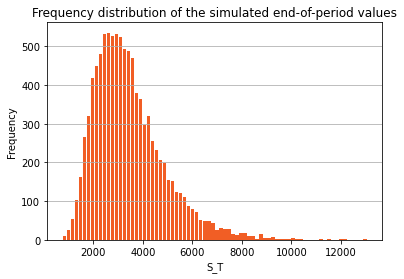

In [22]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[-1,:], bins='auto', color='#f15e25',alpha=1.0, rwidth=0.90)

plt.grid(axis='y', alpha=1.0)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [23]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Monte Carlo: Binary put', str(bpp))

Monte Carlo: Binary put 0.4362


In [24]:
# 3 BLACK-SCHOLES METHOD

import scipy.stats as si

In [25]:
def binary_option_BS(S, K, T, r, sigma, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        option_value = np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) # binary call option value
    elif payoff == "put":
        option_value = np.exp(-r * T) * (1 - si.norm.cdf(d2, 0.0, 1.0)) # binary put option value
    
    return option_value

In [26]:
pp = binary_option_BS(3459, 3000, 2/12, 0.0225, 0.991, "put")
pp

0.4352479917934399

In [27]:
cp = binary_option_BS(3459, 3000, 2/12, 0.0225, 0.991, "call")
cp

0.561009030675731

In [28]:
pp + cp # Put-Call Parity

0.9962570224691709

In [29]:
S = np.linspace(2500,3500,11)
T = [1/365, 3/365, 1/52, 1/12, 2/12]

In [30]:
pp = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        pp[i,j] = binary_option_BS(S[j], 3000, T[i], 0.0225, 0.991, "put")

/var/folders/cg/j5fkrc1d6135tpn12wsbpsg00000gn/T/ipykernel_5105/2624213236.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


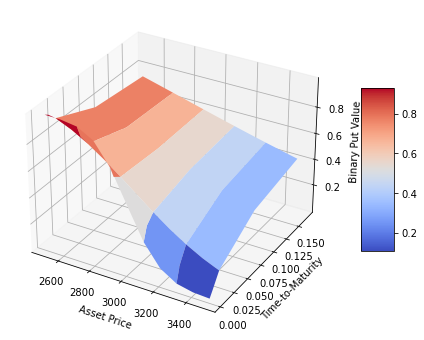

In [31]:
# Binary put option value

Asset_Price, TTM = np.meshgrid(S, T)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Asset_Price, TTM, pp, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Asset Price')
ax.set_ylabel('Time-to-Maturity')
ax.set_zlabel('Binary Put Value')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [32]:
# ANALYSIS

# GREEKS

# DELTA: rate of change of hypothetical option value with respect to changes in the underlying asset price

def delta(S, K, T, r, sigma, payoff):
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / (sigma * (S) * np.sqrt(T))
    elif payoff == "put":
        delta = - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / (sigma * (S) * np.sqrt(T))
    return delta

In [33]:
delta(3459, 3000, 2/12, 0.0225, 0.991, "put")

-0.0002804475959117394

In [34]:
S = np.linspace(2500,3500,11)
T = [1/365, 3/365, 1/52, 1/12, 2/12] 

In [35]:
Delta_Put = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Delta_Put[i,j] = delta(S[j], 3000, T[i], 0.0225, 0.991, "put") 

/var/folders/cg/j5fkrc1d6135tpn12wsbpsg00000gn/T/ipykernel_5105/3580472086.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


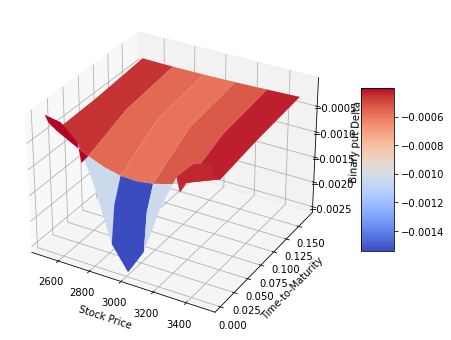

In [36]:
Stock, TTM = np.meshgrid(S, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Stock, TTM, Delta_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time-to-Maturity')
ax.set_zlabel('Binary put Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [37]:
# GAMMA: rate of change in the delta with respect to changes in the underlying price

def gamma(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        gamma = - np.exp(-r * T) * d1 * si.norm.pdf(d2, 0.0, 1.0) / ((sigma ** 2) * (S ** 2)) * (np.sqrt(T))
    elif payoff == "put":
        gamma = np.exp(-r * T) * d1 * si.norm.pdf(d2, 0.0, 1.0) / ((sigma ** 2) * (S ** 2)) * (np.sqrt(T))
    return gamma

In [38]:
gamma(3459, 3000, 2/12, 0.0225, 0.991, "put")

7.683016689413367e-09

In [39]:
S = np.linspace(2500,4500,11)
T = [1/365, 3/365, 1/52, 1/12, 2/12]

In [40]:
Gamma_Put = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Gamma_Put[i,j] = gamma(S[j], 3000, T[i], 0.0225, 0.991, "put") 

/var/folders/cg/j5fkrc1d6135tpn12wsbpsg00000gn/T/ipykernel_5105/2989575019.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


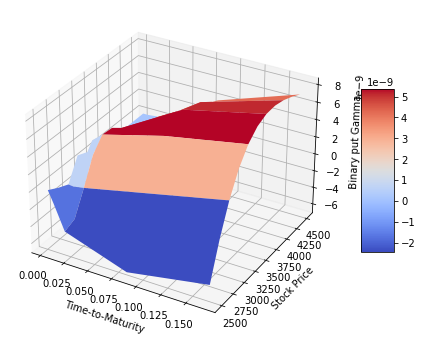

In [41]:
Stock, TTM = np.meshgrid(S, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(TTM, Stock, Gamma_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Time-to-Maturity')
ax.set_ylabel('Stock Price')
ax.set_zlabel('Binary put Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [42]:
S = np.linspace(2500,4500,11)
Gamma_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma_Put[i] = gamma(S[i], 3000, 2/12, 0.0225, 0.991, "put") 

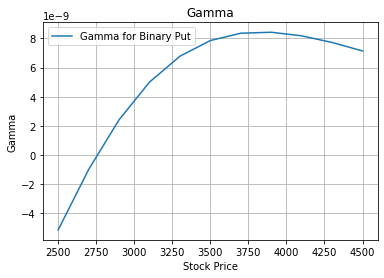

In [43]:
# gamma detail at expiry 

fig = plt.figure()
plt.plot(S, Gamma_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Binary Put'])

In [44]:
# THETA: measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay"

def theta(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        theta = (r * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) + np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)) * ((d1 / 2 * T) - (r / sigma * np.sqrt(T)))
    elif payoff == "put":
        theta = (r * np.exp(-r * T) * (1 - si.norm.cdf(d2, 0.0, 1.0)) - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)) * ((d1 / 2 * T) - (r / sigma * np.sqrt(T)))
    return theta

In [45]:
theta(3459, 3000, 2/12, 0.0225, 0.991, "put")

-0.014421036819079285

In [46]:
T = [1/365, 3/365, 1/52, 1/12, 2/12]
S = np.linspace(1500,3500,11)

In [48]:
Theta_Put = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Theta_Put[i,j] = theta(S[j], 3000, T[i], 0.0225, 0.991, "put")

/var/folders/cg/j5fkrc1d6135tpn12wsbpsg00000gn/T/ipykernel_5105/2771299475.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


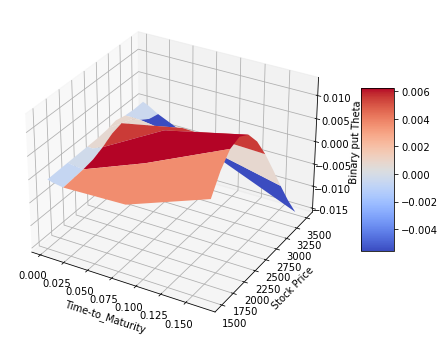

In [49]:
Stock, TTM = np.meshgrid(S, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(TTM, Stock, Theta_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Time-to_Maturity')
ax.set_ylabel('Stock Price')
ax.set_zlabel('Binary put Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [50]:
# SPEED: measures the rate of change in Gamma with respect to changes in the underlying price

def speed(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        speed = - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / ((sigma ** 2) * (S ** 3) * np.sqrt(T)) * ((-2 * d1) + (1 - (d1 * d2)) / (sigma * np.sqrt(T)))
    elif payoff == "put":
        speed = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / ((sigma ** 2) * (S ** 3) * np.sqrt(T)) * ((-2 * d1) + (1 - (d1 * d2)) / (sigma * np.sqrt(T)))
    return speed

In [51]:
speed(3459, 3000, 2/12, 0.0225, 0.991, "put")

2.6575191763521115e-11

In [52]:
S = np.linspace(1500,4000,10)
T = [1/365, 3/365, 1/52, 1/12, 2/12]

In [53]:
Speed_Put = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Speed_Put[i,j] = speed(S[j], 3000, T[i], 0.0225, 0.991, "put")

/var/folders/cg/j5fkrc1d6135tpn12wsbpsg00000gn/T/ipykernel_5105/1312249701.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


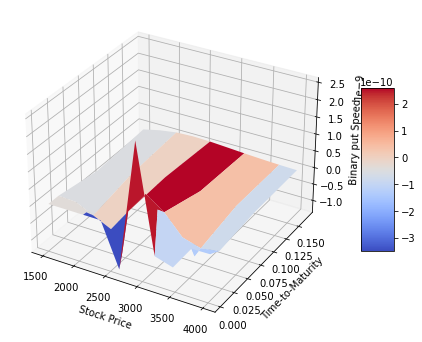

In [54]:
Stock, TTM = np.meshgrid(S, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Stock, TTM, Speed_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time-to-Maturity')
ax.set_zlabel('Binary put Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [55]:
S = np.linspace(1500,4000,10)
Speed_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Speed_Put[i] = speed(S[i], 3000, 2/12, 0.0225, 0.991, "put")

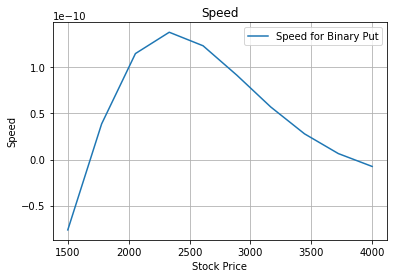

In [56]:
# speed detail at expiry 

fig = plt.figure()
plt.plot(S, Speed_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Binary Put'])

In [57]:
# VEGA: measures sensitivity to volatility

def vega(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        vega = - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) * (d1 / sigma)
    elif payoff == "put":
        vega = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) * (d1 / sigma)
    return vega

In [58]:
vega(3459, 3000, 2/12, 0.0225, 0.991, "put")

0.22314244135288588

In [59]:
sigma = np.linspace(0.10,1,13)
T = [1/365, 3/365, 1/52, 1/12, 2/12] 

In [60]:
Vega_Put = np.zeros((len(T),len(sigma)))
for i in range(len(T)):
    for j in range(len(sigma)):
        Vega_Put[i,j] = vega(3459, 3000, T[i], 0.0225, sigma[j], "put") 

/var/folders/cg/j5fkrc1d6135tpn12wsbpsg00000gn/T/ipykernel_5105/3821449139.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


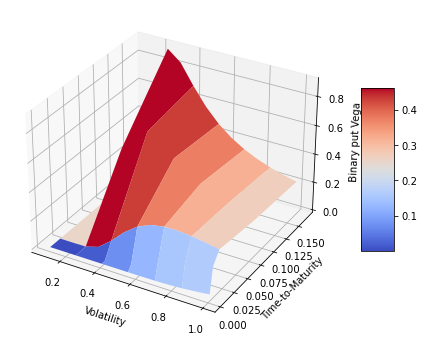

In [61]:
Vol, TTM = np.meshgrid(sigma, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Vol, TTM, Vega_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Volatility')
ax.set_ylabel('Time-to-Maturity')
ax.set_zlabel('Binary put Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [62]:
# RHO: measures sensitivity to the interest rate

def rho(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        rho =  - T * np.exp(-r * T) * si.norm.cdf(d2) + ((np.sqrt(T) / sigma) * (np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)))
    elif payoff == "put":
        rho =  - T * np.exp(-r * T) * (1 - si.norm.cdf(d2)) - ((np.sqrt(T) / sigma) * (np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)))
    return rho

In [63]:
rho(3459, 3000, 2/12, 0.0225, 0.991, "put")

-0.2342193710086911

In [64]:
r = np.linspace(0,0.03,10)
T = [1/365, 3/365, 1/52, 1/12, 2/12]

In [65]:
Rho_Put = np.zeros((len(T),len(r)))
for i in range(len(T)):
    for j in range(len(r)):
        Rho_Put[i,j] = rho(3459, 3000, T[i], r[j], 0.991, "put") 

/var/folders/cg/j5fkrc1d6135tpn12wsbpsg00000gn/T/ipykernel_5105/1969783652.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


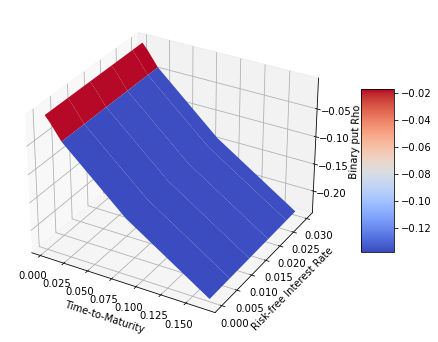

In [66]:
Int, TTM = np.meshgrid(r, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(TTM, Int, Rho_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Time-to-Maturity')
ax.set_ylabel('Risk-free Interest Rate')
ax.set_zlabel('Binary put Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);